# - Business Problem
Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
book = pd.read_csv("/content/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
book.shape

(2000, 11)

In [27]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# Applyong Apriori

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns


In [7]:
df1 = apriori(book, min_support = 0.1, use_colnames = True,)
df1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


# Let see our interpretation values by using the association rules

In [8]:
# Let see our interpretation values using the association rules
df_ar = association_rules(df1, metric = "support",min_threshold=0.2)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


*There are only 2 observation support value which are >20%* 

In [9]:
df2 = association_rules(df1, metric = "confidence",min_threshold=0.5)
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


In [10]:
df2.shape

(49, 9)

*There are 49 Oservation who's confidence value is >50%*

In [11]:
df3=pd.DataFrame(df2,columns=["support","confidence","lift"])
df3

,support,confidence,lift
0,0.1650,0.666667,1.576044
1,0.2560,0.605201,1.404179
2,0.2560,0.593968,1.404179
3,0.1840,0.652482,1.542511
4,0.1515,0.706294,1.669725
5,0.1625,0.674274,1.594028
6,0.1950,0.706522,1.670264
7,0.1620,0.654545,1.518667
8,0.1875,0.664894,1.542677
9,0.1525,0.710956,1.649549


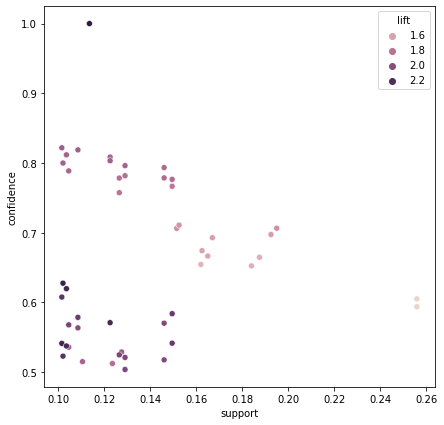

In [12]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df3, x="support", y="confidence", hue="lift")
plt.show()

In [13]:
from mpl_toolkits import mplot3d

In [14]:
support = df3["support"]
confidence =  df3["confidence"]
lift = df3["lift"]

Text(0.5, 0, 'lift')

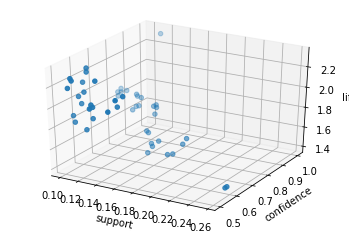

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("support")
ax.set_ylabel("confidence")
ax.set_zlabel("lift")


# Checking the dataset by dimensinality reduction

In [16]:
book_value = df3.values
book_value

array([[0.165     , 0.66666667, 1.57604413],
       [0.256     , 0.60520095, 1.40417853],
       [0.256     , 0.59396752, 1.40417853],
       [0.184     , 0.65248227, 1.54251128],
       [0.1515    , 0.70629371, 1.66972507],
       [0.1625    , 0.67427386, 1.59402804],
       [0.195     , 0.70652174, 1.67026416],
       [0.162     , 0.65454545, 1.51866695],
       [0.1875    , 0.66489362, 1.54267661],
       [0.1525    , 0.71095571, 1.64954921],
       [0.167     , 0.69294606, 1.60776348],
       [0.1925    , 0.69746377, 1.6182454 ],
       [0.1135    , 1.        , 2.32018561],
       [0.1235    , 0.51244813, 1.81719196],
       [0.1105    , 0.51515152, 1.866491  ],
       [0.1275    , 0.52904564, 1.91683204],
       [0.129     , 0.78181818, 1.8139633 ],
       [0.129     , 0.7962963 , 1.88249715],
       [0.129     , 0.50390625, 2.03598485],
       [0.129     , 0.52121212, 2.03598485],
       [0.146     , 0.79347826, 1.84101685],
       [0.146     , 0.77866667, 1.84081954],
       [0.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [18]:
book_norm = scale(book_value)
book_norm

array([[ 0.78138486,  0.02845454, -1.34301245],
       [ 3.31811225, -0.49721216, -2.08178838],
       [ 3.31811225, -0.5932826 , -2.08178838],
       [ 1.31103124, -0.09285316, -1.48715569],
       [ 0.40505717,  0.36735262, -0.94031856],
       [ 0.71169454,  0.09351271, -1.26570741],
       [ 1.61766861,  0.3693028 , -0.93800127],
       [ 0.69775648, -0.07520841, -1.58965215],
       [ 1.40859767,  0.01329107, -1.48644501],
       [ 0.43293329,  0.40722298, -1.02704586],
       [ 0.83713711,  0.25320096, -1.20666469],
       [ 1.5479783 ,  0.29183728, -1.16160742],
       [-0.65423559,  2.87918545,  1.85573016],
       [-0.37547434, -1.29045209, -0.30642215],
       [-0.73786397, -1.26733224, -0.0945069 ],
       [-0.26396984, -1.14850698,  0.12188748],
       [-0.22215565,  1.01325249, -0.32030077],
       [-0.22215565,  1.13707211, -0.02570335],
       [-0.22215565, -1.36350392,  0.6340739 ],
       [-0.22215565, -1.21550077,  0.6340739 ],
       [ 0.25173848,  1.11297173, -0.204

In [19]:
pca = PCA(n_components=2)

In [20]:
pca_value=pca.fit_transform(book_norm)
pca_value

array([[ 1.49317305, -0.13776875],
       [ 3.66829519, -1.28911596],
       [ 3.65248318, -1.38176754],
       [ 1.93824335, -0.38960343],
       [ 1.00536956,  0.27592044],
       [ 1.40127803, -0.05902371],
       [ 1.83446276, -0.04083546],
       [ 1.593927  , -0.20841402],
       [ 2.02202406, -0.31288963],
       [ 1.09258817,  0.30963603],
       [ 1.47155244,  0.06026491],
       [ 1.93272235, -0.09056449],
       [-1.29150791,  2.8932339 ],
       [-0.25199936, -1.13674504],
       [-0.64680018, -1.02556631],
       [-0.45632719, -1.04192343],
       [ 0.24200941,  1.04511286],
       [ 0.0532584 ,  1.15573685],
       [-0.82667124, -1.27553532],
       [-0.80231176, -1.13279917],
       [ 0.50039928,  1.01331619],
       [ 0.48015277,  0.89117775],
       [-0.3671674 , -0.85058033],
       [-0.44118105, -1.28426856],
       [-0.03388538,  1.30548591],
       [-0.11136903,  1.25881164],
       [-1.45078626, -0.69875597],
       [ 0.21332462,  1.03673505],
       [ 0.23088441,

In [21]:
var = pca.explained_variance_ratio_
var

array([0.59445931, 0.33796256])

In [22]:
var1 = np.cumsum(np.round(var,decimals=2)*100)
var1

array([59., 93.])

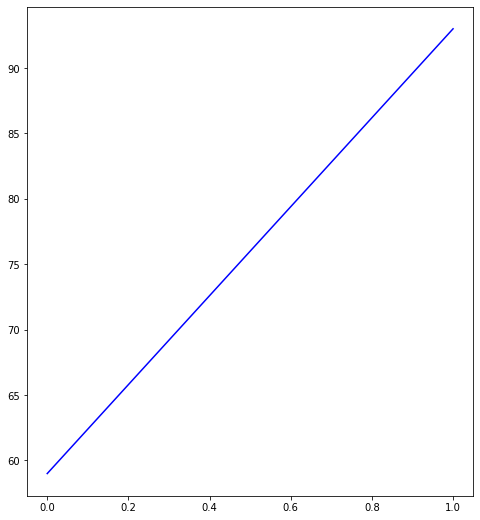

In [23]:
plt.figure(figsize=(8,9))
plt.plot(var1, color='blue')

In [24]:
pca.components_

array([[ 0.68481724,  0.16458763, -0.70988468],
       [-0.26271198,  0.96441293, -0.02983478]])

In [25]:
data=pd.DataFrame(pca_value,columns=["pca_1", "pca_2",])
data

,pca_1,pca_2
0,1.493173,-0.137769
1,3.668295,-1.289116
2,3.652483,-1.381768
3,1.938243,-0.389603
4,1.005370,0.275920
5,1.401278,-0.059024
6,1.834463,-0.040835
7,1.593927,-0.208414
8,2.022024,-0.312890
9,1.092588,0.309636


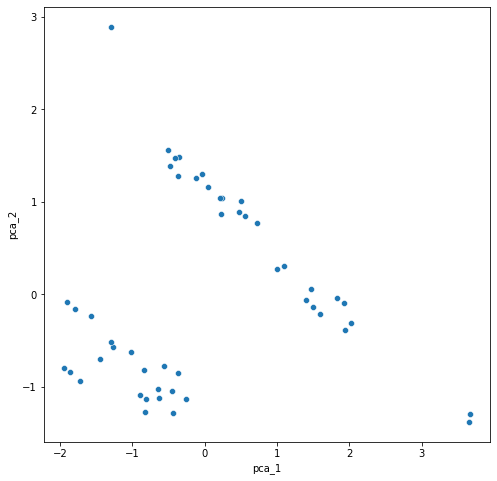

In [26]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x="pca_1", y="pca_2")
plt.show()

# **Conclusion**
- In support more than 20% there are only 2 observation
- In confidence value 60% has 49 
- Chances of purchaseing 'y' product with 'x' is high